In [95]:
import torch
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary
import torch.optim.lr_scheduler as scheduler
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [96]:
path = '/Users/charlie/ML/Stocks/Data/Unordered.csv'

In [97]:
df = pd.read_csv(path)
df.fillna(method='pad')
df = df.sample(frac=1).reset_index()
df.head()


,index,Unnamed: 0,Security,TimeStamp,Num Of Trading Min,OrderType,LastBuyScore,LastSellScore,Position Num of Buys,Position Current Price Real,...,Daily Max Gain Loss Ratio From Open,Daily Current Gain Loss Diff From Open Close,Position Trailing Stop,Position Trailing Percent,Position Trailing Loss Percent,Position Last Sell DT,Position Num of Days Since Last Sell,Opp Pos Num of Days Since Last Buy,Opp Pos Num of Days Since Last Sell,OrderId
0,291,268,TQQQ,2022-01-07 16:38:00+00:00,128,BUY,-0.817695,NaN,2,72.440,...,5.427549,0.026856,0,0,0,2022-01-07 15:06:00+00:00,0.0,0,0,f2e0fce9bc3e4e1abd2d271f638633f6
1,44,1078,SQQQ,2022-09-07 14:13:00+00:00,43,BUY,-1.185154,NaN,1,47.919,...,-0.021270,0.372748,0,0,0,2022-09-06 17:35:00+00:00,1.0,2,2,54ad57b840f9430bae3ca1d0d3a8228c
2,628,928,TQQQ,2022-07-19 14:05:00+00:00,35,BUY,5.839257,NaN,1,27.070,...,18.952532,-3.744746,0,0,0,2022-07-18 14:48:00+00:00,1.0,1,1,133b35108ffa463eb5cfc0b3c1049d6d
3,87,698,TQQQ,2022-05-09 16:19:00+00:00,169,BUY,-1.001405,NaN,1,32.280,...,9.040348,5.923144,0,0,0,2022-05-06 17:24:00+00:00,1.0,0,0,c0dd22406116410d8d8cbd65b6a5fbee
4,187,214,TQQQ,2021-12-16 15:36:00+00:00,66,BUY,-0.884682,NaN,1,81.100,...,4.420817,-0.735871,0,0,0,2021-12-15 19:36:00+00:00,1.0,0,0,f683a6aadaa24fb7883a3a7f45c3f413


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <

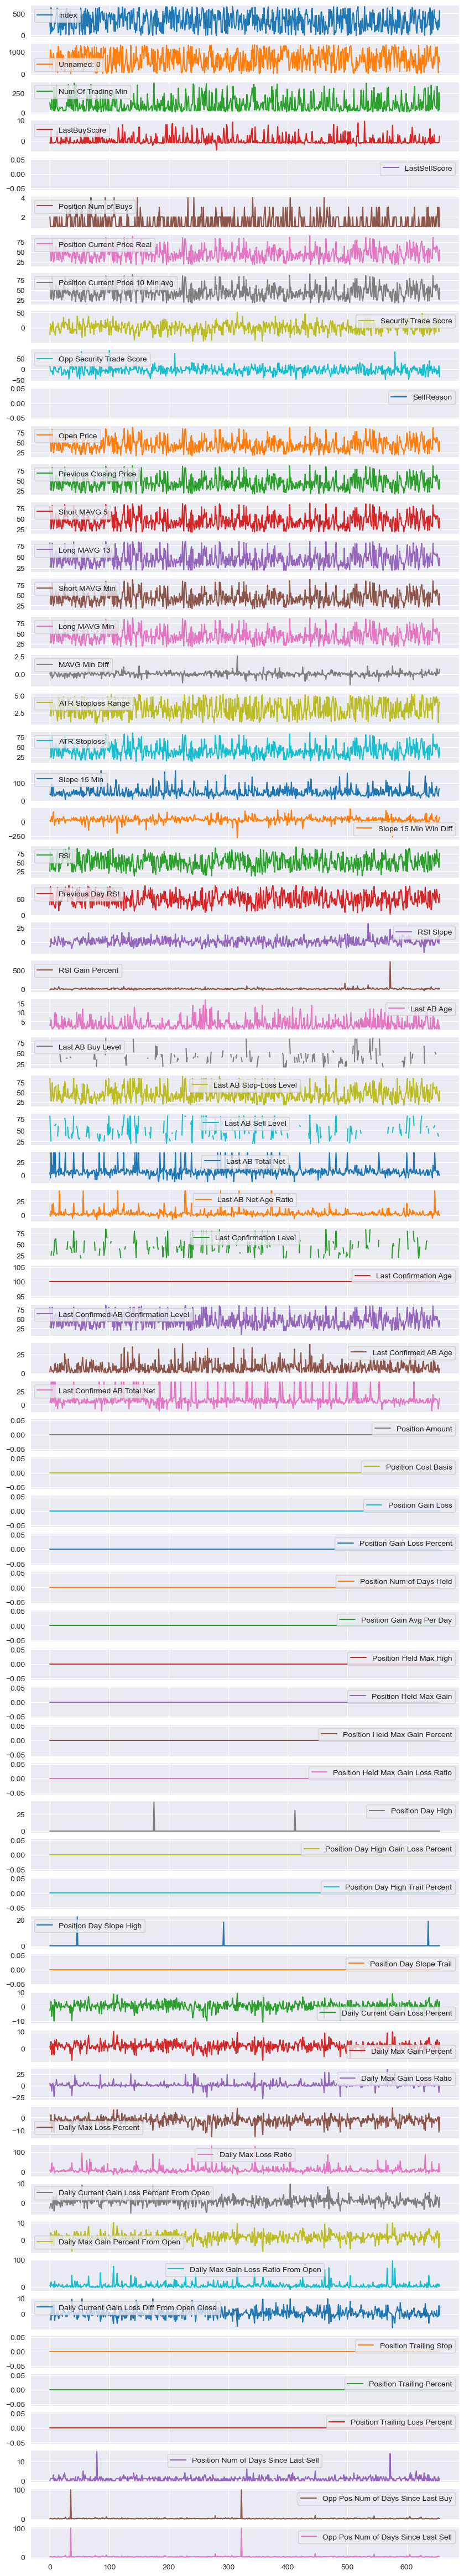

In [98]:
df.plot(figsize=(10, 60), subplots=True)

In [99]:
scaler = MinMaxScaler(feature_range=(-4,9))
price = scaler.fit_transform(df.filter(['LastBuyScore']).values)
price

array([[-6.16100556e-01],
       [-9.59060170e-01],
       [ 5.59700725e+00],
       [-7.87561812e-01],
       [-6.78621188e-01],
       [-7.49145114e-01],
       [-7.08392605e-01],
       [-7.08386791e-01],
       [-5.98856298e-01],
       [-6.25616282e-01],
       [-5.57170402e-01],
       [ 5.30541985e-01],
       [ 4.46085366e+00],
       [-5.58271688e-01],
       [-8.51247205e-01],
       [-7.78961093e-01],
       [-6.32461330e-01],
       [-3.18135323e-01],
       [-1.29206084e+00],
       [ 1.68360067e+00],
       [-6.45673559e-01],
       [-7.40415183e-01],
       [ 8.44364542e-01],
       [-7.20281694e-01],
       [-1.86142520e-01],
       [-6.47838138e-01],
       [ 1.79923261e+00],
       [-9.93943546e-01],
       [ 3.72389955e+00],
       [ 5.81289068e-01],
       [-3.97526518e-02],
       [ 2.08278298e-02],
       [-1.18983754e+00],
       [-6.11274954e-01],
       [ 2.09247683e+00],
       [-5.77788690e-01],
       [-7.06171687e-01],
       [-6.17268818e-01],
       [-7.0

In [100]:
def split_data(stock, lookback):
    data_raw =np.asarray(stock) # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [101]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price, lookback)

In [102]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

In [103]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [104]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [105]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)


In [106]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))


Epoch  0 MSE:  4.184722423553467
Epoch  1 MSE:  4.14839506149292
Epoch  2 MSE:  4.155608177185059
Epoch  3 MSE:  4.14374303817749
Epoch  4 MSE:  4.1371846199035645
Epoch  5 MSE:  4.137053966522217
Epoch  6 MSE:  4.136542797088623
Epoch  7 MSE:  4.133098602294922
Epoch  8 MSE:  4.127617359161377
Epoch  9 MSE:  4.122316360473633
Epoch  10 MSE:  4.118298053741455
Epoch  11 MSE:  4.112627029418945
Epoch  12 MSE:  4.102592945098877
Epoch  13 MSE:  4.090854167938232
Epoch  14 MSE:  4.081371784210205
Epoch  15 MSE:  4.076706409454346
Epoch  16 MSE:  4.073284149169922
Epoch  17 MSE:  4.064637184143066
Epoch  18 MSE:  4.052807807922363
Epoch  19 MSE:  4.040138244628906
Epoch  20 MSE:  4.025611877441406
Epoch  21 MSE:  4.009546279907227
Epoch  22 MSE:  3.992065191268921
Epoch  23 MSE:  3.97236967086792
Epoch  24 MSE:  3.9577860832214355
Epoch  25 MSE:  3.9447243213653564
Epoch  26 MSE:  3.9279232025146484
Epoch  27 MSE:  3.907209873199463
Epoch  28 MSE:  3.884977102279663
Epoch  29 MSE:  3.86217

In [107]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

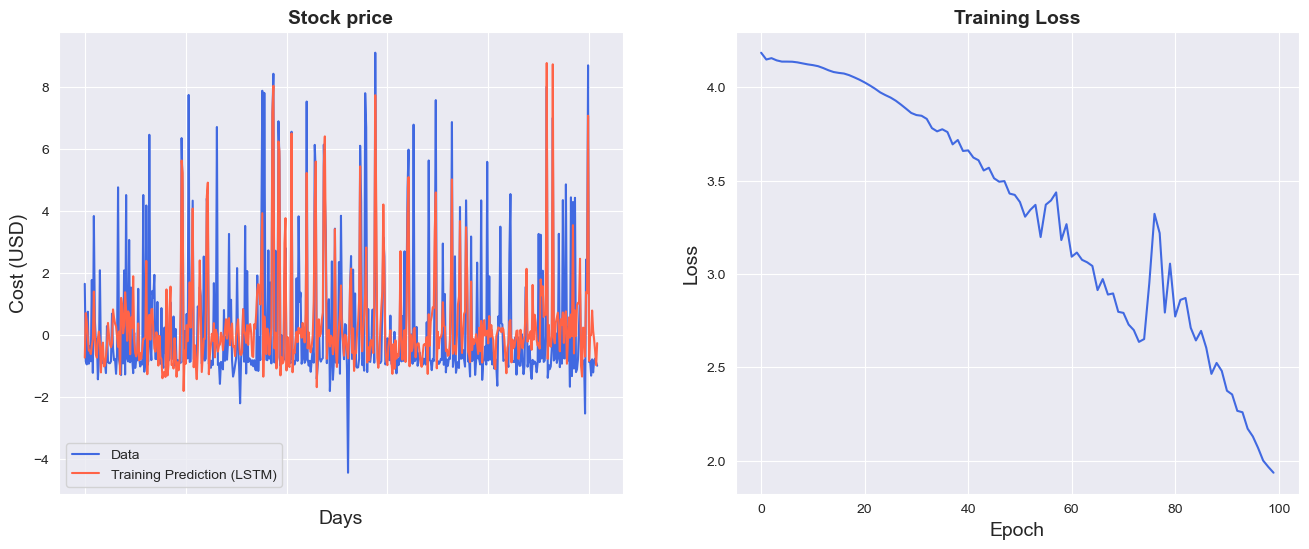

In [108]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [109]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 1.49 RMSE
Test Score: 2.63 RMSE


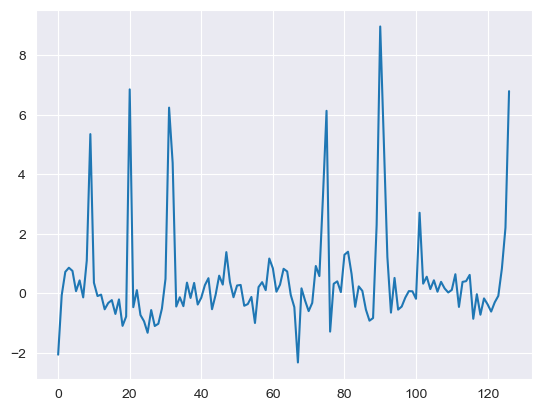

In [110]:

plt.plot(y_test_pred)

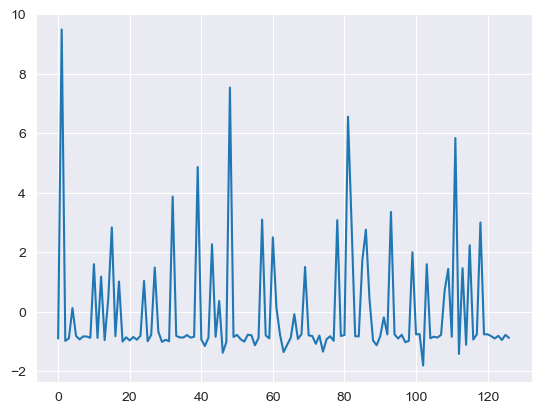

In [111]:
plt.plot(y_test)

In [112]:

print(y_train_pred, y_train_lstm)

[[-7.30762124e-01]
 [ 7.00341403e-01]
 [ 4.24048632e-01]
 [-8.05296376e-02]
 [-5.07167339e-01]
 [-5.08518040e-01]
 [-6.18705511e-01]
 [-3.39496374e-01]
 [-1.33792534e-01]
 [ 1.39753044e+00]
 [-3.65724489e-02]
 [-6.33621693e-01]
 [-7.35460401e-01]
 [-1.03806853e-01]
 [ 1.09221265e-01]
 [-2.17810109e-01]
 [-1.20932269e+00]
 [-4.32625830e-01]
 [-2.48622462e-01]
 [-1.01544821e+00]
 [-9.91198540e-01]
 [-7.04749942e-01]
 [-3.57420444e-01]
 [ 3.85737330e-01]
 [-6.84624119e-03]
 [-3.05486470e-01]
 [-3.97336751e-01]
 [-2.56033957e-01]
 [ 8.20976853e-01]
 [ 5.54582953e-01]
 [ 3.64973575e-01]
 [ 2.82413870e-01]
 [-3.84796262e-02]
 [-3.85742426e-01]
 [ 1.12372726e-01]
 [-1.26961851e+00]
 [ 1.19301438e+00]
 [ 9.67517495e-01]
 [ 5.08244038e-02]
 [ 2.84092337e-01]
 [ 1.37478197e+00]
 [ 7.82952845e-01]
 [-1.91434205e-01]
 [ 7.58307874e-01]
 [ 6.53755188e-01]
 [-6.23091817e-01]
 [ 5.60961068e-01]
 [ 2.25491464e-01]
 [ 1.89073873e+00]
 [-1.85636923e-01]
 [-5.73242784e-01]
 [-6.93491757e-01]
 [-5.4656302